# There are multiple ways to balance the datasets.
* resample
* smote ---> This is the best way.

In [1]:
import random
import numpy as np
import pandas as pd

In [2]:
df1 = pd.DataFrame(np.random.random(size=(100,2)), columns=["feature1", "feature2"])
df1["target"] = 0
df1

,feature1,feature2,target
0,0.977720,0.840341,0
1,0.543751,0.932204,0
2,0.738440,0.352755,0
3,0.897513,0.375930,0
4,0.873570,0.582491,0
...,...,...,...
95,0.458774,0.411899,0
96,0.339925,0.616919,0
97,0.237324,0.762502,0
98,0.020991,0.326497,0


In [3]:
df2 = pd.DataFrame(np.random.random(size=(900,2)), columns=["feature1", "feature2"])
df2["target"] = 1
df2

,feature1,feature2,target
0,0.475807,0.613875,1
1,0.218466,0.101641,1
2,0.246632,0.553979,1
3,0.380295,0.441547,1
4,0.032566,0.462857,1
...,...,...,...
895,0.786163,0.169760,1
896,0.253820,0.135549,1
897,0.393222,0.201966,1
898,0.291733,0.772996,1


# Original Dataset

In [4]:
df = pd.concat([df1, df2])
df

,feature1,feature2,target
0,0.977720,0.840341,0
1,0.543751,0.932204,0
2,0.738440,0.352755,0
3,0.897513,0.375930,0
4,0.873570,0.582491,0
...,...,...,...
895,0.786163,0.169760,1
896,0.253820,0.135549,1
897,0.393222,0.201966,1
898,0.291733,0.772996,1


### Imbalanced Dataset with 900 -> 1's and 100 -> 0's

In [5]:
df["target"].value_counts()

target
1    900
0    100
Name: count, dtype: int64

In [6]:
row = df.shape[0]              # row, col = df.shape
row

1000

### df_minority === df1, df_majority === df2
* In case if df1 and df2 are not given.
* We can able to segregate the dataframe seperately from original dataframe(df) which have values 0's and values 1's.

In [7]:
df_minority = df[df["target"] == 0]
display(df_minority)

df_majority = df[df["target"] == 1]
display(df_majority)

,feature1,feature2,target
0,0.977720,0.840341,0
1,0.543751,0.932204,0
2,0.738440,0.352755,0
3,0.897513,0.375930,0
4,0.873570,0.582491,0
...,...,...,...
95,0.458774,0.411899,0
96,0.339925,0.616919,0
97,0.237324,0.762502,0
98,0.020991,0.326497,0


,feature1,feature2,target
0,0.475807,0.613875,1
1,0.218466,0.101641,1
2,0.246632,0.553979,1
3,0.380295,0.441547,1
4,0.032566,0.462857,1
...,...,...,...
895,0.786163,0.169760,1
896,0.253820,0.135549,1
897,0.393222,0.201966,1
898,0.291733,0.772996,1


# 1.resample

In [8]:
from sklearn.utils import resample

### Upsampling the 0's dataframe.

In [9]:
temp1 = resample(df_minority, n_samples=len(df_majority))    # every time you run the cell shuffling happens.
temp1

,feature1,feature2,target
24,0.737386,0.898473,0
0,0.977720,0.840341,0
14,0.185844,0.916342,0
94,0.899860,0.538947,0
13,0.590802,0.977305,0
...,...,...,...
89,0.819045,0.181006,0
43,0.887318,0.144354,0
64,0.410327,0.223850,0
66,0.476006,0.778395,0


### You can re-run the cell multiple times, Data shuffling won't happen.
* use random_state = some integer value.

In [10]:
temp1 = resample(df_minority, n_samples=len(df_majority), random_state=42)
temp1

,feature1,feature2,target
51,0.503104,0.336095,0
92,0.073553,0.265749,0
14,0.185844,0.916342,0
71,0.120539,0.266023,0
60,0.913431,0.144182,0
...,...,...,...
52,0.233828,0.012124,0
65,0.993472,0.577169,0
76,0.079009,0.015711,0
42,0.556749,0.037819,0


### Upsampled Dataframe.
* Here 900 -> 0's and 900 -> 1's are present
* Now the dataframe is balanced.

In [11]:
df_upsampled = pd.concat([temp1,df_majority])
df_upsampled

,feature1,feature2,target
51,0.503104,0.336095,0
92,0.073553,0.265749,0
14,0.185844,0.916342,0
71,0.120539,0.266023,0
60,0.913431,0.144182,0
...,...,...,...
895,0.786163,0.169760,1
896,0.253820,0.135549,1
897,0.393222,0.201966,1
898,0.291733,0.772996,1


In [12]:
df_upsampled["target"].value_counts()

target
0    900
1    900
Name: count, dtype: int64

### Downsampling the 1's dataframe.
* There will be a data loss if we do downsampling, better go for upsampling.

In [13]:
temp2 = resample(df_majority, n_samples=len(df_minority), random_state=10)
temp2

,feature1,feature2,target
265,0.973622,0.374055,1
125,0.677495,0.975253,1
527,0.554123,0.442332,1
320,0.981403,0.451465,1
369,0.842796,0.618306,1
...,...,...,...
246,0.940855,0.464835,1
597,0.990542,0.116936,1
746,0.437614,0.088648,1
662,0.871535,0.210085,1


### Downsampled Dataframe.
* Here 100 -> 0's and 100 -> 1's are present
* Now the dataframe is balanced.

In [14]:
df_downsampled = pd.concat([df_minority, temp2])
df_downsampled

,feature1,feature2,target
0,0.977720,0.840341,0
1,0.543751,0.932204,0
2,0.738440,0.352755,0
3,0.897513,0.375930,0
4,0.873570,0.582491,0
...,...,...,...
246,0.940855,0.464835,1
597,0.990542,0.116936,1
746,0.437614,0.088648,1
662,0.871535,0.210085,1


In [15]:
df_downsampled["target"].value_counts()

target
0    100
1    100
Name: count, dtype: int64

# 2.SMOTE(Synthetic Minority Oversampling Technique)

In [16]:
from sklearn.datasets import make_classification

### Generating Dataframe
* n_redundant + n_repeated + n_informative <= n_features.
* n_features ---> no.of columns
* weights = [0.9] ---> generates 90% with 0's and 10% with 1's

In [17]:
# Generate a synthetic classification dataset
X, y = make_classification(n_samples=1000, n_features=2, weights=[0.9], random_state=26, n_redundant=0)

# Convert to a DataFrame for better visualization
df = pd.DataFrame(X, columns=[f'Feature_{i+1}' for i in range(X.shape[1])])
df['Target'] = y

df

,Feature_1,Feature_2,Target
0,1.181967,0.376687,0
1,-1.298394,-1.116139,0
2,-0.475969,-0.749306,0
3,2.134637,0.379844,0
4,0.449692,-0.373241,0
...,...,...,...
995,-0.908763,-1.009194,0
996,-2.374978,0.888491,1
997,0.745661,-0.665880,0
998,-2.471019,-1.760446,0


In [18]:
df["Target"].value_counts()

Target
0    898
1    102
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt

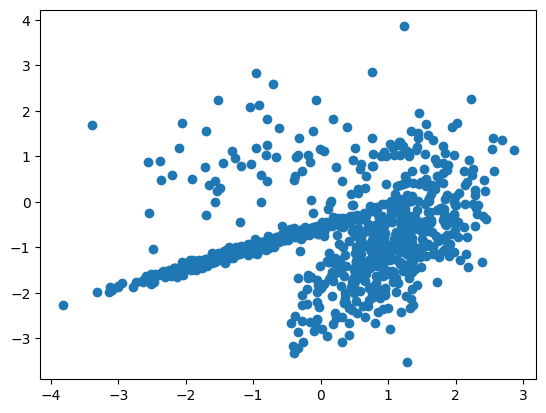

In [20]:
plt.scatter(df["Feature_1"], df["Feature_2"])
plt.show()

### 90% of datapoints are violet and 10% are yellow.
* c ---> color

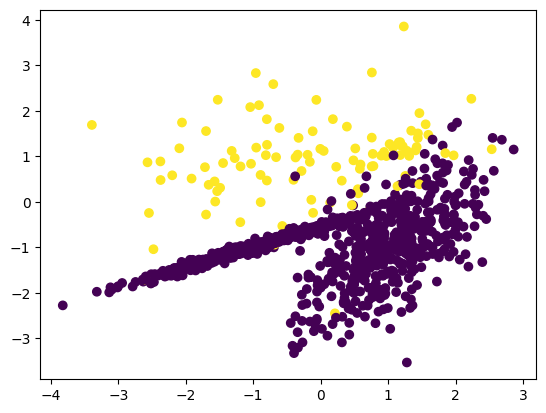

In [21]:
plt.scatter(df["Feature_1"], df["Feature_2"], c=df["Target"])
plt.show()

In [22]:
# pip install imblearn

In [23]:
from imblearn.over_sampling import SMOTE

In [24]:
X, y = SMOTE().fit_resample(df[["Feature_1", "Feature_2"]], df["Target"])

df_oversampled = pd.concat([X, y], axis=1)
df_oversampled

,Feature_1,Feature_2,Target
0,1.181967,0.376687,0
1,-1.298394,-1.116139,0
2,-0.475969,-0.749306,0
3,2.134637,0.379844,0
4,0.449692,-0.373241,0
...,...,...,...
1791,0.574054,0.155894,1
1792,1.439493,1.505689,1
1793,-1.443929,0.852363,1
1794,1.466335,1.943281,1


In [25]:
df_oversampled["Target"].value_counts()

Target
0    898
1    898
Name: count, dtype: int64

### The data points are balanced.

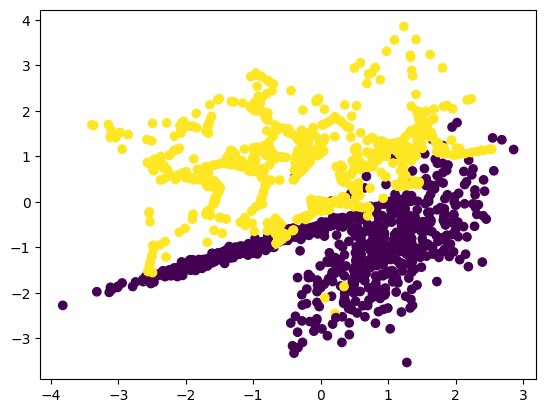

In [26]:
plt.scatter(df_oversampled["Feature_1"], df_oversampled["Feature_2"], c=df_oversampled["Target"])
plt.show()